In [48]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.dynamics as gd
import gala.potential as gp
from gala.potential import NullPotential
from gala.units import galactic

Define a potential and helpers

In [49]:
pot = gp.KeplerPotential(m=1e11 * u.M_sun, units=galactic)

N = 1000

def integrate_and_get_phase(pos, vel):
    ics = gd.PhaseSpacePosition(pos=pos, vel=vel)
    orbit = pot.integrate_orbit(ics, dt=dt, n_steps=n_steps)
    final = orbit[-1]
    return final.pos.xyz.value, final.vel.d_xyz.value

def plot_phase(pos, vel, label, color):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axes = ['X', 'Y', 'Z']
    
    for i in range(3):
        axs[i].scatter(pos[i], vel[i], s=5, alpha=0.5, color=color)
        axs[i].set_xlabel(f'{axes[i]} [kpc]')
        axs[i].set_ylabel(f'V{axes[i]} [km/s]')
        axs[i].grid(True)
        axs[i].set_title(f'{axes[i]} vs V{axes[i]}')

    fig.suptitle(f'{label} - Phase Space', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Generate positions

In [50]:
r = np.random.normal(8, 1, N) * u.kpc
theta = np.random.uniform(0, 2*np.pi, N)
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.random.normal(0, 0.2, N) * u.kpc 

pos = np.array([x.value, y.value, z.value]) * u.kpc

Circular velocities

        Use name instead. [gala.dynamics.core]


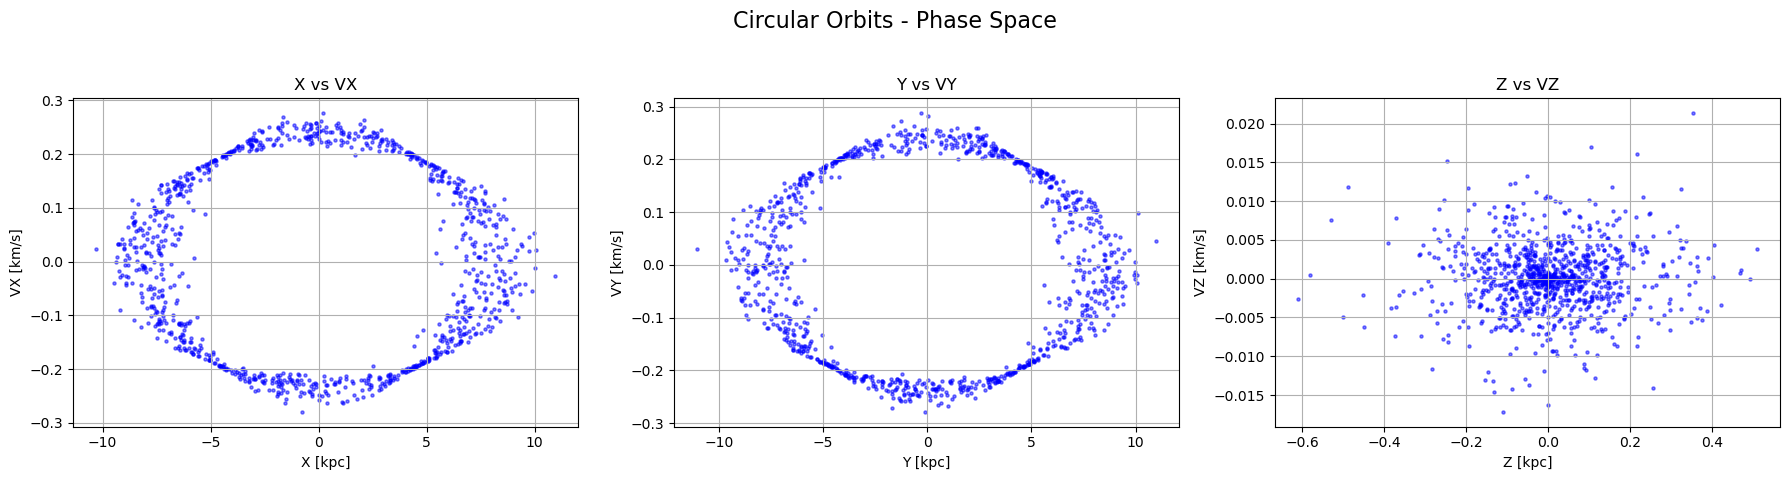

In [51]:
v_circ = pot.circular_velocity([x, y, z])

vx1 = -v_circ * np.sin(theta)
vy1 = v_circ * np.cos(theta)
vz1 = np.zeros(N) * u.km/u.s

dt = 0.1 * u.Myr
n_steps = int(500 * u.Myr / abs(dt))

pos1, vel1 = integrate_and_get_phase(pos, [vx1.value, vy1.value, vz1.value] * u.km/u.s)
# 500 Myr ago
plot_phase(pos1, vel1, 'Circular Orbits', 'blue')

Random velocities (thermal)

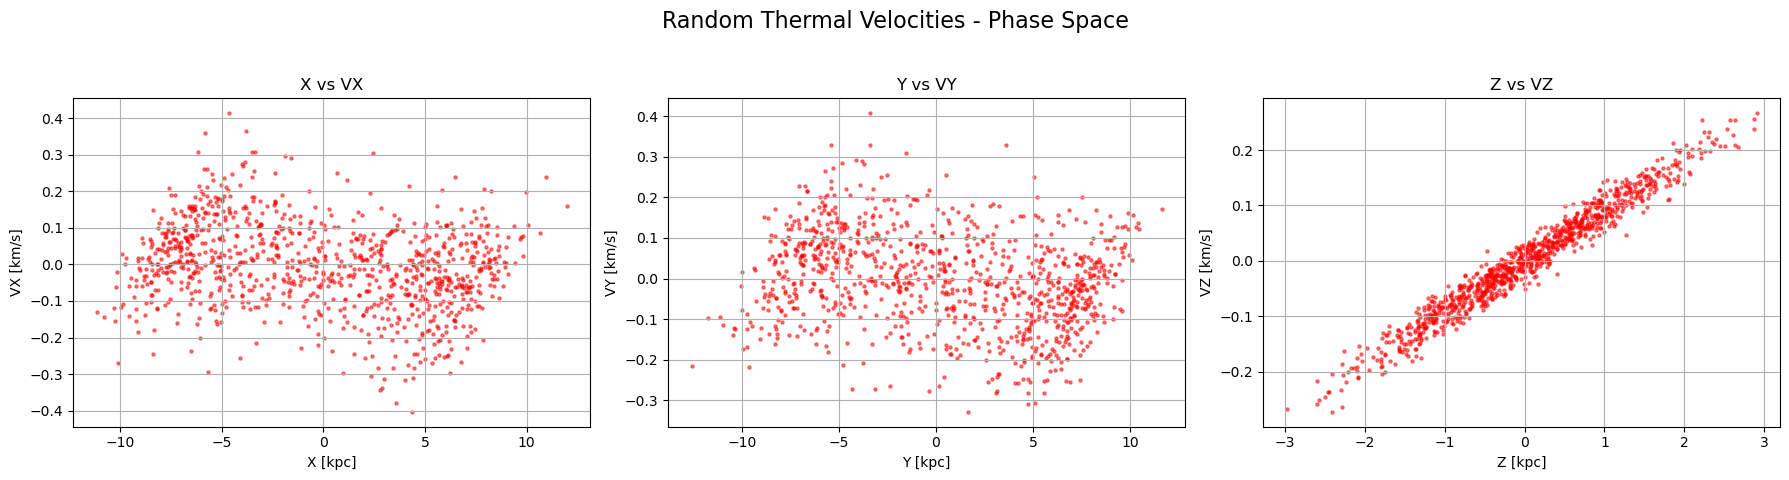

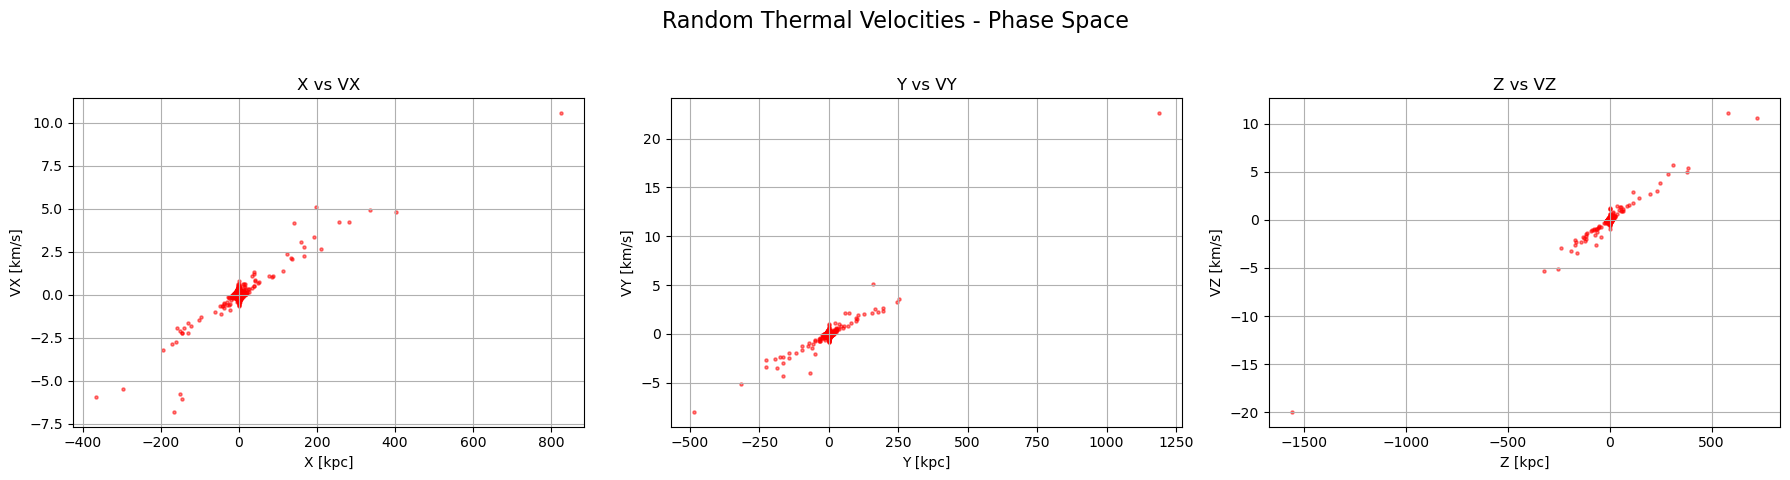

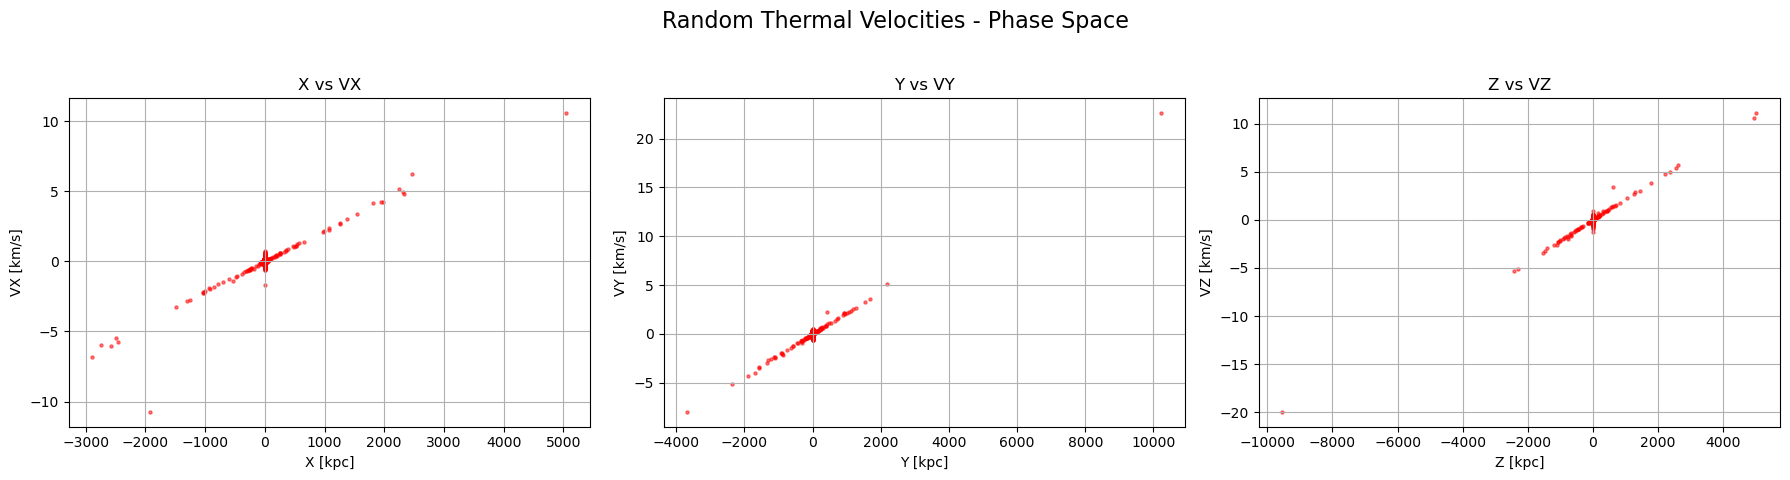

In [52]:
vx3 = np.random.normal(0, 100, N) * u.km/u.s
vy3 = np.random.normal(0, 100, N) * u.km/u.s
vz3 = np.random.normal(0, 100, N) * u.km/u.s

dt = 0.1 * u.Myr

n_steps = int(10 * u.Myr / abs(dt))
pos3, vel3 = integrate_and_get_phase(pos, [vx3.value, vy3.value, vz3.value] * u.km/u.s)
# 10 Myr ago
plot_phase(pos3, vel3, 'Random Thermal Velocities', 'red')

n_steps = int(100 * u.Myr / abs(dt))
pos3, vel3 = integrate_and_get_phase(pos, [vx3.value, vy3.value, vz3.value] * u.km/u.s)
# 100 Myr ago
plot_phase(pos3, vel3, 'Random Thermal Velocities', 'red')

n_steps = int(500 * u.Myr / abs(dt))
pos3, vel3 = integrate_and_get_phase(pos, [vx3.value, vy3.value, vz3.value] * u.km/u.s)
# 500 Myr ago
plot_phase(pos3, vel3, 'Random Thermal Velocities', 'red')

Straight line motion

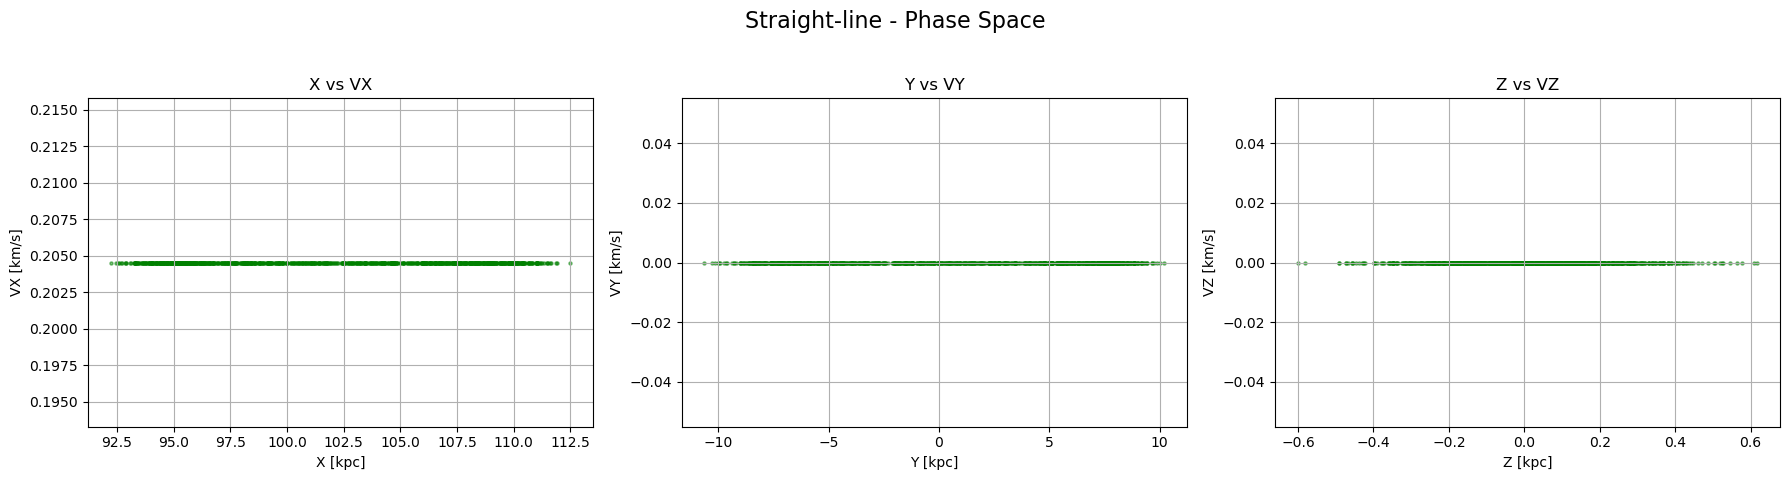

In [53]:
vx2 = np.full(N, 200) * u.km/u.s
vy2 = np.zeros(N) * u.km/u.s
vz2 = np.zeros(N) * u.km/u.s

dt = 0.1 * u.Myr
n_steps = int(500 * u.Myr / abs(dt))

pot = gp.NullPotential(units=galactic)
pos2, vel2 = integrate_and_get_phase(pos, [vx2.value, vy2.value, vz2.value] * u.km/u.s)
# 500 Myr ago
plot_phase(pos2, vel2, 'Straight-line', 'green')